In [1]:
from utils.load_results import *
from utils.plot_helpers import *

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import torch
from utils.analysis_from_interaction import *
from language_analysis_local import TopographicSimilarityConceptLevel, encode_target_concepts_for_topsim

In [2]:
datasets = ['(3,16)']
n_values = [16,]
n_attributes = [3,]
n_epochs = 300
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]

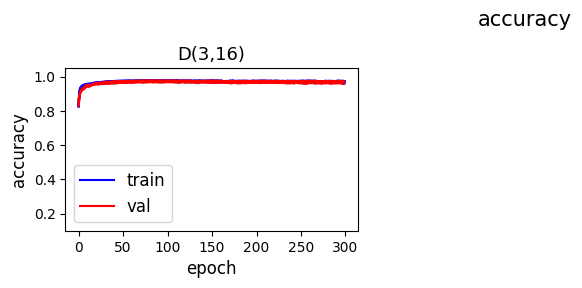

In [3]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=10, zero_shot=False, context_unaware=False)
plot_training_trajectory(all_accuracies['train_acc'], all_accuracies['val_acc'], ylim=(0.1, 1.05), steps=(1, 2), 
                         n_epochs=300, titles=('D(3,16)',), plot_indices=(1,))

In [4]:
context_unaware = False # whether original or context_unaware simulations are evaluated
if context_unaware:
    setting = 'context_unaware'
else:
    setting = 'standard'

In [5]:
# select first run
path_to_run = paths[0] + '/' + str(setting) +'/' + str(0) + '/'
path_to_interaction_train = (path_to_run + 'interactions/train/epoch_' + str(n_epochs) + '/interaction_gpu0')
path_to_interaction_val = (path_to_run + 'interactions/validation/epoch_' + str(n_epochs) + '/interaction_gpu0')
interaction = torch.load(path_to_interaction_train)

In [6]:
messages = interaction.message.argmax(dim=-1)
messages = [msg.tolist() for msg in messages]
sender_input = interaction.sender_input
print(sender_input.shape)
n_targets = int(sender_input.shape[1]/2)
# get target objects and fixed vectors to re-construct concepts
target_objects = sender_input[:, :n_targets]
print(target_objects.shape)
target_objects = k_hot_to_attributes(target_objects, n_values[0])
print(target_objects.shape)
# concepts are defined by a list of target objects (here one sampled target object) and a fixed vector
(objects, fixed) = retrieve_concepts_sampling(target_objects, all_targets=True)
# add one such that zero becomes an empty attribute for the calculation (_)
#objects = objects + 1
#concepts = torch.from_numpy(objects * (np.array(fixed)))
concepts = list(zip(objects, fixed))

torch.Size([83302, 20, 48])
torch.Size([83302, 10, 48])
(83302, 10, 3)


In [7]:
fixed_index = 0 # define a fixed index for the concept
fixed_value = 6 # define a fixed value for this index
#index_threshold = 20000 # optional: define some index threshold to make sure that examples are not taken from the beginning of training
all_for_this_concept = []
for idx, (t_objects, t_fixed) in enumerate(concepts):
    if sum(t_fixed) == 1 and t_fixed[fixed_index] == 1:# and idx > index_threshold:
        for t_object in t_objects:
            if t_object[fixed_index] == fixed_value:
                all_for_this_concept.append((idx, t_object, t_fixed, messages[idx]))
sample = random.sample(all_for_this_concept, 20)
column_names = ['game_nr', 'object', 'fixed indices', 'message']
pd.DataFrame(sample, columns=column_names)

,game_nr,object,fixed indices,message
0,51894,"[6.0, 15.0, 7.0]","[1.0, 0.0, 0.0]","[35, 10, 22, 0]"
1,58239,"[6.0, 2.0, 11.0]","[1.0, 0.0, 0.0]","[26, 10, 22, 0]"
2,51894,"[6.0, 13.0, 2.0]","[1.0, 0.0, 0.0]","[35, 10, 22, 0]"
3,40413,"[6.0, 0.0, 15.0]","[1.0, 0.0, 0.0]","[35, 10, 22, 0]"
4,58832,"[6.0, 5.0, 12.0]","[1.0, 0.0, 0.0]","[35, 26, 22, 0]"
5,81147,"[6.0, 7.0, 12.0]","[1.0, 0.0, 0.0]","[35, 38, 10, 0]"
6,48596,"[6.0, 5.0, 3.0]","[1.0, 0.0, 0.0]","[35, 10, 38, 0]"
7,53677,"[6.0, 14.0, 5.0]","[1.0, 0.0, 0.0]","[35, 38, 26, 0]"
8,29202,"[6.0, 0.0, 4.0]","[1.0, 0.0, 0.0]","[35, 10, 22, 0]"
9,51894,"[6.0, 7.0, 9.0]","[1.0, 0.0, 0.0]","[35, 10, 22, 0]"


In [8]:
fixed_index = 2 # define a fixed index for the concept
fixed_value = 15 # define a fixed value for this index
#index_threshold = 50000 # optional: define some index threshold to make sure that examples are not taken from the beginning of training
all_for_this_concept = []
for idx, (t_objects, t_fixed) in enumerate(concepts):
    if sum(t_fixed) == 1 and t_fixed[fixed_index] == 1:# and idx > index_threshold:
        for t_object in t_objects:
            if t_object[fixed_index] == fixed_value:
                all_for_this_concept.append((idx, t_object, t_fixed, messages[idx]))
sample = random.sample(all_for_this_concept, 20)
pd.DataFrame(sample, columns=column_names)

,game_nr,object,fixed indices,message
0,44652,"[0.0, 6.0, 15.0]","[0.0, 0.0, 1.0]","[35, 38, 8, 0]"
1,1214,"[9.0, 14.0, 15.0]","[0.0, 0.0, 1.0]","[35, 38, 8, 0]"
2,18490,"[10.0, 0.0, 15.0]","[0.0, 0.0, 1.0]","[35, 38, 8, 0]"
3,51116,"[11.0, 14.0, 15.0]","[0.0, 0.0, 1.0]","[16, 8, 38, 0]"
4,18490,"[3.0, 12.0, 15.0]","[0.0, 0.0, 1.0]","[35, 38, 8, 0]"
5,18490,"[13.0, 2.0, 15.0]","[0.0, 0.0, 1.0]","[35, 38, 8, 0]"
6,47464,"[13.0, 13.0, 15.0]","[0.0, 0.0, 1.0]","[16, 29, 38, 0]"
7,82036,"[6.0, 10.0, 15.0]","[0.0, 0.0, 1.0]","[16, 16, 16, 0]"
8,47464,"[8.0, 14.0, 15.0]","[0.0, 0.0, 1.0]","[16, 29, 38, 0]"
9,82036,"[9.0, 4.0, 15.0]","[0.0, 0.0, 1.0]","[16, 16, 16, 0]"


Output contains redundant information: In the same game, the same message is used to refer to different objects because only one message is transmitted.

# Topographic similarity over time

In [ ]:
# topsim over time
messages = interaction.message.argmax(dim=-1)
sender_input = interaction.sender_input
messages = [msg.tolist() for msg in messages]
encoded_input = encode_target_concepts_for_topsim(sender_input)
dim = [n_values[0]]*n_attributes[0]
TOPSIM = TopographicSimilarityConceptLevel(dim, is_gumbel=True)

samples = 5000
num_batches = len(messages) // samples + (len(messages) % samples > 0)
topsim_over_time = []

for i in range(num_batches):
    messages_batch = messages[i * samples:(i + 1) * samples]
    topsim = TOPSIM.compute_topsim(encoded_input[i * samples:(i + 1) * samples], messages_batch)
    topsim_over_time.append(topsim)

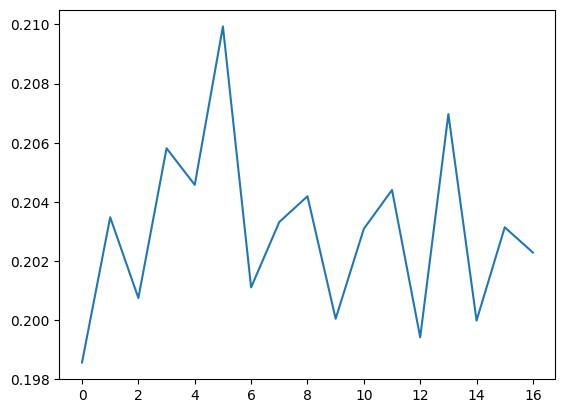

In [17]:
plt.plot(topsim_over_time)

In [24]:
round(max(topsim_over_time) - min(topsim_over_time), 3)

0.011

Topographic similarity changes by at most 0.011 points over time. The best estimate of the 'true' topsim score would probably be to take samples from all phases of training and calculate the average. But also any other sampling method should return a value that is close enough to the true value.